In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)


Saving base_datos_limpia_8marzo.xlsx to base_datos_limpia_8marzo.xlsx



 Verificación de Datos Antes de Entrenar el Modelo
Datos nulos:
fecha                   0
precio                  0
precio por m2           0
Piso                    0
superficie              0
nº habitaciones         0
nº baños                0
ascensor                0
parking                 0
trastero                0
densidad poblacional    0
Distrito                0
dtype: int64

Categorías en Distrito:
['Ciudad Lineal' 'Barajas' 'Carabanchel' 'Villa De Vallecas' 'Moncloa'
 'Salamanca' 'Fuencarral-El-Pardo' 'Retiro' 'Hortaleza' 'Latina'
 'Chamberí' 'Vicálvaro' 'Tetuán' 'San Blas' 'Arganzuela' 'Puente Vallecas'
 'Chamartín' 'Centro' 'Usera' 'Villaverde']

 Regresión Lineal - Métricas del Modelo:
🔹 MAE: 836.13 €
🔹 RMSE: 1104.19 €
🔹 R²: 0.6287

 Diagnóstico del Modelo:
🔹 R² Entrenamiento: 0.6410
🔹 R² Prueba: 0.6287
🔹 Resultado: Buen Ajuste

 Importancia de las Variables en Regresión Lineal:
                             Variable  Coeficiente
13             cat__Distrito_Chamberí  2

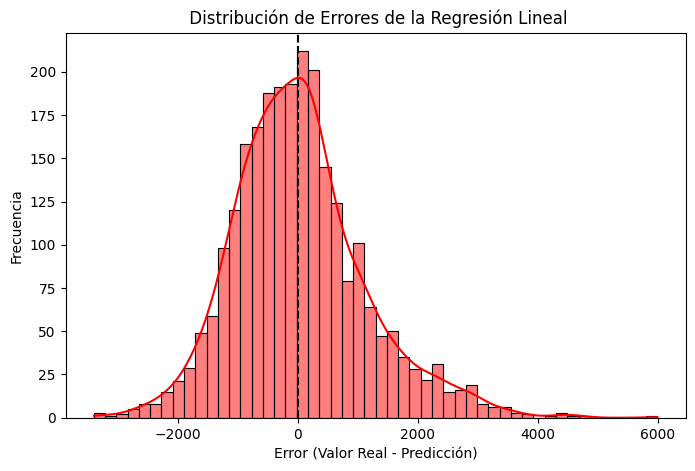

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


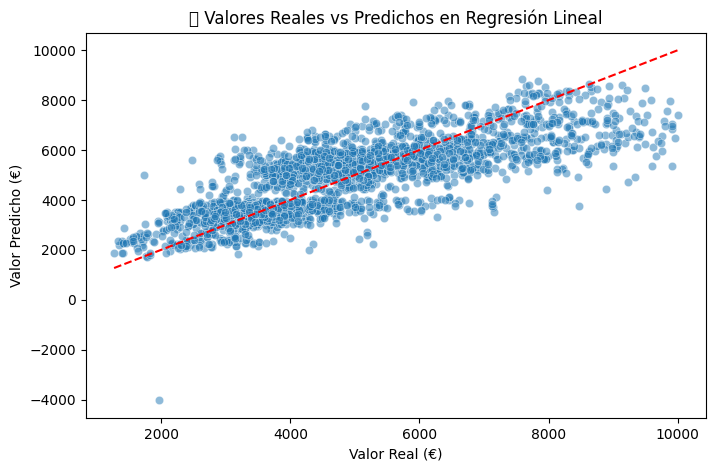

In [ ]:
df["Distrito"] = df["Distrito"].str.title().str.strip()

print("\n Verificación de Datos Antes de Entrenar el Modelo")
print(f"Datos nulos:\n{df.isnull().sum()}\n")
print(f"Categorías en Distrito:\n{df['Distrito'].unique()}\n")

X = df.drop(columns=["precio por m2", "precio", "fecha"])
y = df["precio por m2"]

num_features = ["Piso", "superficie", "nº habitaciones", "nº baños", "ascensor", "parking", "trastero", "densidad poblacional"]
cat_features = ["Distrito"]

preprocessor = ColumnTransformer(transformers=[
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Regresión Lineal - Métricas del Modelo:")
print(f" MAE: {mae:.2f} €")
print(f" RMSE: {rmse:.2f} €")
print(f" R²: {r2:.4f}")

y_train_pred = lr_pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

def detect_overfitting(r2_train, r2_test, threshold=0.1):
    if r2_train - r2_test > threshold:
        return "Posible Overfitting (el modelo se ajusta demasiado a los datos de entrenamiento)"
    elif r2_test > r2_train:
        return "Posible Underfitting (el modelo no capta bien los patrones)"
    else:
        return "Buen Ajuste"

diagnostico = detect_overfitting(r2_train, r2_test)

print(f"\n Diagnóstico del Modelo:")
print(f" R² Entrenamiento: {r2_train:.4f}")
print(f" R² Prueba: {r2_test:.4f}")
print(f" Resultado: {diagnostico}")

lr_model = lr_pipeline.named_steps["model"]
intercept = lr_model.intercept_
coefficients = lr_model.coef_

feature_names = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame({"Variable": feature_names, "Coeficiente": coefficients})
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)

print("\n Importancia de las Variables en Regresión Lineal:")
print(coef_df)

variables_irrelevantes = coef_df[abs(coef_df["Coeficiente"]) < 10]["Variable"].tolist()
print(f"\n Variables con baja influencia a considerar eliminar: {variables_irrelevantes}")

errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=50, kde=True, color="red")
plt.axvline(0, color='black', linestyle='dashed')
plt.title(" Distribución de Errores de la Regresión Lineal")
plt.xlabel("Error (Valor Real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title(" Valores Reales vs Predichos en Regresión Lineal")
plt.xlabel("Valor Real (€)")
plt.ylabel("Valor Predicho (€)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

In [ ]:
lr_model = lr_pipeline.named_steps["model"]

intercept = lr_model.intercept_

coefficients = lr_model.coef_

feature_names = preprocessor.get_feature_names_out()

print(f"Ecuación de la regresión lineal:")
print(f"Y = {intercept:.4f} ", end="")

for name, coef in zip(feature_names, coefficients):
    print(f"+ ({coef:.4f} * {name}) ", end="")

print()


Ecuación de la regresión lineal:
Y = 4745.6294 + (63.7563 * num__Piso) + (-5.3567 * num__superficie) + (-80.9289 * num__nº habitaciones) + (279.2863 * num__nº baños) + (406.9619 * num__ascensor) + (42.9082 * num__parking) + (125.4373 * num__trastero) + (-0.0018 * num__densidad poblacional) + (683.2009 * cat__Distrito_Arganzuela) + (-738.5204 * cat__Distrito_Barajas) + (-1582.2343 * cat__Distrito_Carabanchel) + (2069.3877 * cat__Distrito_Centro) + (1954.2108 * cat__Distrito_Chamartín) + (2758.8067 * cat__Distrito_Chamberí) + (705.1272 * cat__Distrito_Ciudad Lineal) + (763.8421 * cat__Distrito_Fuencarral-El-Pardo) + (315.8582 * cat__Distrito_Hortaleza) + (-1595.2996 * cat__Distrito_Latina) + (1333.0186 * cat__Distrito_Moncloa) + (-1336.1623 * cat__Distrito_Puente Vallecas) + (1579.7733 * cat__Distrito_Retiro) + (1346.8391 * cat__Distrito_Salamanca) + (-418.0686 * cat__Distrito_San Blas) + (-37.2217 * cat__Distrito_Tetuán) + (-1236.0967 * cat__Distrito_Usera) + (-2023.8126 * cat__Distrito